# Set up

In [28]:
import pandas as pd
x_train = pd.read_csv('final_APA_X_train.csv')
x_test = pd.read_csv('final_APA_X_val.csv')
y_train = pd.read_csv('final_APA_y_train.csv')
y_test = pd.read_csv('final_APA_y_val.csv')

In [29]:
from pandas.core.window.rolling import numba_notes
#Regression Models
from sklearn.ensemble import GradientBoostingRegressor as XGBRegressor
#Linear Regression ( https://www.w3schools.com/python/python_ml_multiple_regression.asp )
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
#Ridge Regression ( https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html )
from sklearn import linear_model
ridge = linear_model.Ridge()
#Lasso Regression ( https://towardsdatascience.com/hyperparameter-tuning-in-lasso-and-ridge-regressions-70a4b158ae6d )
from sklearn.linear_model import Lasso, LassoCV, LinearRegression
lasso = linear_model.Lasso()
#KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor()
#Random Forrest ( https://towardsdatascience.com/random-forest-in-python-24d0893d51c0 )
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
#Decision Trees ( https://medium.com/pursuitnotes/decision-tree-regression-in-6-steps-with-python-1a1c5aa2ee16 )
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
#SVM - SVR
from sklearn import svm
SVR_m = svm.SVR()
#Gradient Boosting Regressor ( https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html#sklearn.ensemble.GradientBoostingRegressor )
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
# create an xgboost regression model: higher performance than gradient boosting
import xgboost as xg
xgb = xg.XGBRegressor()

In [30]:
#Best models
from sklearn.svm import SVR

#Linear regression - no tuning
model_1 = LinearRegression()
#Ridge Regression
model_2 = linear_model.Ridge(alpha=0.0)
#Lasso Regression
model_3 = linear_model.Lasso(alpha=0.0)
#K Nearest Neighbours Regression
model_4 = KNeighborsRegressor(n_neighbors = 10, weights= 'distance')
#Random Forrest Regressor
model_5 = RandomForestRegressor(max_depth=5, n_estimators=550)
#DT Regressors
model_6 = DecisionTreeRegressor(max_depth=3, max_features='auto', min_weight_fraction_leaf=0.2)
#SVM Regressor
model_7 = SVR(C=10, gamma=0.001)
#Gradient Boosting Regressor 
model_8 = GradientBoostingRegressor(learning_rate=0.02, n_estimators=80, random_state=0)
#XGBoost
model_9 = xg.XGBRegressor(n_estimators=60, max_depth = 3, learning_rate = 0.2)

models = [model_1, model_2, model_3, model_4, model_5, model_6, model_7, model_8, model_9]

In [31]:
x_train

,overall,potential,wage_eur,age,height_cm,weight_kg,release_clause_eur,pace,shooting,passing,...,club_team_id,league_level,club_position,club_contract_valid_until,preferred_foot,weak_foot,skill_moves,international_reputation,att_wr,def_wr
0,0.137931,0.290323,0.012876,0.304348,0.617021,0.298246,0.009039,0.652174,0.565789,0.500000,...,1938.0,2.0,3,2024.0,1,4.0,3.0,1.0,2,2
1,0.379310,0.451613,0.118741,0.391304,0.510638,0.315789,0.036625,0.695652,0.381579,0.533333,...,144.0,2.0,1,2024.0,1,2.0,2.0,1.0,2,2
2,0.275862,0.419355,0.030043,0.434783,0.638298,0.473684,0.012789,0.550725,0.671053,0.533333,...,897.0,1.0,2,2022.0,1,3.0,2.0,1.0,0,2
3,0.137931,0.193548,0.015737,0.434783,0.489362,0.403509,0.006361,0.768116,0.618421,0.383333,...,171.0,2.0,3,2026.0,1,3.0,3.0,1.0,2,2
4,0.000000,0.000000,0.004292,0.565217,0.574468,0.368421,0.001591,0.637681,0.565789,0.400000,...,1456.0,1.0,3,2021.0,1,4.0,3.0,1.0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8856,0.448276,0.419355,0.133047,0.652174,0.574468,0.456140,0.040643,0.536232,0.802632,0.716667,...,166.0,1.0,0,2024.0,1,4.0,3.0,3.0,2,1
8857,0.103448,0.096774,0.001431,0.608696,0.255319,0.350877,0.003147,0.608696,0.565789,0.516667,...,111722.0,1.0,3,2025.0,0,4.0,3.0,1.0,0,2
8858,0.482759,0.451613,0.070100,0.652174,0.617021,0.473684,0.055641,0.318841,0.368421,0.366667,...,463.0,1.0,1,2022.0,1,3.0,2.0,1.0,2,0
8859,0.000000,0.000000,0.001431,0.695652,0.361702,0.315789,0.001004,0.550725,0.381579,0.500000,...,113197.0,1.0,3,2022.0,0,2.0,2.0,1.0,2,0


In [32]:
x_test

,overall,potential,wage_eur,age,height_cm,weight_kg,release_clause_eur,pace,shooting,passing,...,club_team_id,league_level,club_position,club_contract_valid_until,preferred_foot,weak_foot,skill_moves,international_reputation,att_wr,def_wr
0,0.034483,0.032258,0.004292,0.782609,0.297872,0.385965,0.000637,0.637681,0.513158,0.466667,...,113149.0,1.0,3,2021.0,0,3.0,3.0,1.0,0,2
1,0.103448,0.096774,0.001431,0.782609,0.404255,0.350877,0.001473,0.695652,0.644737,0.466667,...,113302.0,1.0,0,2022.0,1,4.0,3.0,1.0,0,2
2,0.034483,0.580645,0.004292,0.130435,0.510638,0.403509,0.009843,0.565217,0.526316,0.466667,...,110396.0,1.0,2,2023.0,0,3.0,2.0,1.0,2,2
3,0.068966,0.419355,0.004292,0.260870,0.382979,0.175439,0.008236,0.652174,0.342105,0.400000,...,110831.0,2.0,3,2023.0,0,3.0,2.0,1.0,2,2
4,0.310345,0.290323,0.067239,0.652174,0.680851,0.526316,0.009307,0.376812,0.460526,0.600000,...,10029.0,1.0,3,2022.0,1,3.0,2.0,2.0,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
980,0.068966,0.322581,0.004292,0.260870,0.404255,0.263158,0.007968,0.608696,0.223684,0.300000,...,112996.0,1.0,3,2021.0,0,3.0,2.0,1.0,0,2
981,0.034483,0.032258,0.000000,0.652174,0.468085,0.350877,0.003147,0.666667,0.631579,0.533333,...,110930.0,1.0,3,2022.0,1,3.0,2.0,1.0,0,2
982,0.482759,0.451613,0.124464,0.608696,0.446809,0.403509,0.051088,0.811594,0.605263,0.666667,...,1970.0,1.0,1,2022.0,1,3.0,3.0,1.0,0,0
983,0.241379,0.225806,0.021459,0.652174,0.553191,0.315789,0.005290,0.507246,0.671053,0.483333,...,101146.0,1.0,3,2022.0,1,4.0,3.0,1.0,2,2


#Drop correlated features

In [33]:
x_train = x_train.drop(columns=['overall', 'potential', 'age', 'release_clause_eur'])
x_test = x_test.drop(columns=['overall', 'potential', 'age', 'release_clause_eur'])
x_test.head(3)

,wage_eur,height_cm,weight_kg,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,...,club_team_id,league_level,club_position,club_contract_valid_until,preferred_foot,weak_foot,skill_moves,international_reputation,att_wr,def_wr
0,0.004292,0.297872,0.385965,0.637681,0.513158,0.466667,0.500000,0.586667,0.535714,0.594937,...,113149.0,1.0,3,2021.0,0,3.0,3.0,1.0,0,2
1,0.001431,0.404255,0.350877,0.695652,0.644737,0.466667,0.548387,0.080000,0.553571,0.518987,...,113302.0,1.0,0,2022.0,1,4.0,3.0,1.0,0,2
2,0.004292,0.510638,0.403509,0.565217,0.526316,0.466667,0.516129,0.573333,0.517857,0.430380,...,110396.0,1.0,2,2023.0,0,3.0,2.0,1.0,2,2


In [34]:
x_train.head(3)

,wage_eur,height_cm,weight_kg,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,...,club_team_id,league_level,club_position,club_contract_valid_until,preferred_foot,weak_foot,skill_moves,international_reputation,att_wr,def_wr
0,0.012876,0.617021,0.298246,0.652174,0.565789,0.500000,0.548387,0.626667,0.589286,0.443038,...,1938.0,2.0,3,2024.0,1,4.0,3.0,1.0,2,2
1,0.118741,0.510638,0.315789,0.695652,0.381579,0.533333,0.564516,0.773333,0.714286,0.759494,...,144.0,2.0,1,2024.0,1,2.0,2.0,1.0,2,2
2,0.030043,0.638298,0.473684,0.550725,0.671053,0.533333,0.612903,0.733333,0.714286,0.518987,...,897.0,1.0,2,2022.0,1,3.0,2.0,1.0,0,2


In [35]:
print(x_train.isnull().values.any())
print(x_test.isnull().values.any())
print(y_train.isnull().values.any())
print(y_test.isnull().values.any())

False
False
False
False


Last row of x_train is null

In [36]:
y_train.drop(y_train.tail(1).index,inplace=True)
x_train.drop(x_train.tail(1).index,inplace=True)

In [39]:
print(x_train.isnull().values.any())
print(x_test.isnull().values.any())
print(y_train.isnull().values.any())
print(y_test.isnull().values.any())

False
False
False
False


#Run models

In [40]:
import numpy as np
import pandas as pd
from math import sqrt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import r2_score
model_eval = []
for model in models:
  model.fit(x_train, y_train)
  predictions = model.predict(x_test)
  type(predictions)
  #FIX CALCS
  # Calculate the absolute errors
  errors = abs(predictions - y_test.values)
  # Calculate model evaluation metrics
  mae = mean_absolute_error(y_test, predictions)
  mse = mean_squared_error(y_test, predictions)
  rmse = sqrt(mse)
  r2 = r2_score(y_test, predictions)
  print(f'MODEL: {model}')
  print('Mean Absolute Error: ', mae, ' degrees.')
  print('Mean Squared Error:', mse, ' degrees')
  print('RMSE:', rmse, ' degrees')
  print('R2:', r2)
  model_eval.append({'Model': model, 'Mean Absolute Error': mae, 'Mean Squared Error': mse, 'RMSE': rmse,'R-squared': r2})

df = pd.DataFrame(model_eval)

MODEL: LinearRegression()
Mean Absolute Error:  0.01494881257208985  degrees.
Mean Squared Error: 0.0006897176545537919  degrees
RMSE: 0.0262624761695045  degrees
R2: 0.7326629325429815
MODEL: Ridge(alpha=0.0)
Mean Absolute Error:  0.014948812572037007  degrees.
Mean Squared Error: 0.0006897176545559503  degrees
RMSE: 0.026262476169545596  degrees
R2: 0.732662932542145


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.40478e-27): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
<ipython-input-40-bd188eb1f66a>:8: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  model.fit(x_train, y_train)
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.166e+00, tolerance: 2.209e-03 Linear regression models with null weight for th

MODEL: Lasso(alpha=0.0)
Mean Absolute Error:  0.014948290461426652  degrees.
Mean Squared Error: 0.0006894885946362272  degrees
RMSE: 0.02625811483401326  degrees
R2: 0.7327517169988084
MODEL: KNeighborsRegressor(n_neighbors=10, weights='distance')
Mean Absolute Error:  0.012376360372517608  degrees.
Mean Squared Error: 0.0010088303588887402  degrees
RMSE: 0.03176208996411823  degrees
R2: 0.6089736895579303


<ipython-input-40-bd188eb1f66a>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train, y_train)


MODEL: RandomForestRegressor(max_depth=5, n_estimators=550)
Mean Absolute Error:  0.009058539802039977  degrees.
Mean Squared Error: 0.0004073318889347096  degrees
RMSE: 0.020182464887488583  degrees
R2: 0.8421166807162823
MODEL: DecisionTreeRegressor(max_depth=3, max_features='auto',
                      min_weight_fraction_leaf=0.2)
Mean Absolute Error:  0.017692991929650976  degrees.
Mean Squared Error: 0.001907976370945092  degrees
RMSE: 0.043680388859820056  degrees
R2: 0.26046143024172197


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MODEL: SVR(C=10, gamma=0.001)
Mean Absolute Error:  0.07760682153214378  degrees.
Mean Squared Error: 0.006880023444047791  degrees
RMSE: 0.08294590673473762  degrees
R2: -1.6667220701450445


/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MODEL: GradientBoostingRegressor(learning_rate=0.02, n_estimators=80, random_state=0)
Mean Absolute Error:  0.010844517806653912  degrees.
Mean Squared Error: 0.0005805621528120498  degrees
RMSE: 0.02409485739347817  degrees
R2: 0.7749720013913286
[11:29:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MODEL: XGBRegressor(learning_rate=0.2, n_estimators=60)
Mean Absolute Error:  0.007573737435901217  degrees.
Mean Squared Error: 0.0003035026095077167  degrees
RMSE: 0.017421326284405465  degrees
R2: 0.882361286454474


In [41]:
df

,Model,Mean Absolute Error,Mean Squared Error,RMSE,R-squared
0,LinearRegression(),0.014949,0.000690,0.026262,0.732663
1,Ridge(alpha=0.0),0.014949,0.000690,0.026262,0.732663
2,Lasso(alpha=0.0),0.014948,0.000689,0.026258,0.732752
3,"KNeighborsRegressor(n_neighbors=10, weights='d...",0.012376,0.001009,0.031762,0.608974
4,"(DecisionTreeRegressor(max_depth=5, max_featur...",0.009059,0.000407,0.020182,0.842117
5,"DecisionTreeRegressor(max_depth=3, max_feature...",0.017693,0.001908,0.043680,0.260461
6,"SVR(C=10, gamma=0.001)",0.077607,0.006880,0.082946,-1.666722
7,([DecisionTreeRegressor(criterion='friedman_ms...,0.010845,0.000581,0.024095,0.774972
8,"XGBRegressor(learning_rate=0.2, n_estimators=60)",0.007574,0.000304,0.017421,0.882361


#Feature Importance

In [43]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 575 kB 14.2 MB/s 


In [44]:
import shap

In [45]:
#Best model
model = XGBRegressor(learning_rate=0.2, n_estimators=60)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
Permutation explainer: 986it [00:43, 18.28it/s]                         


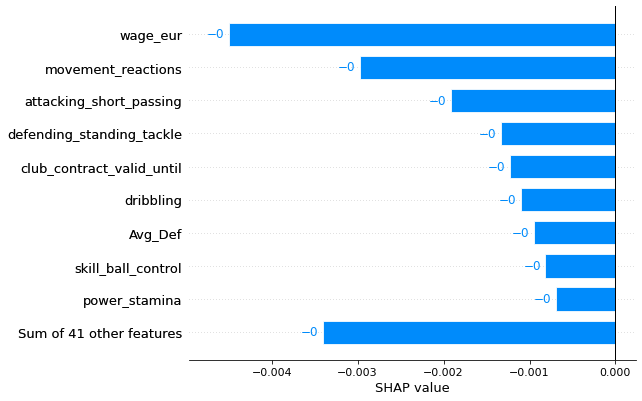

In [46]:
model.fit(x_train, y_train)
explainer = shap.Explainer(model.predict, x_test)
shap_values = explainer(x_test)
shap.plots.bar(shap_values[0])

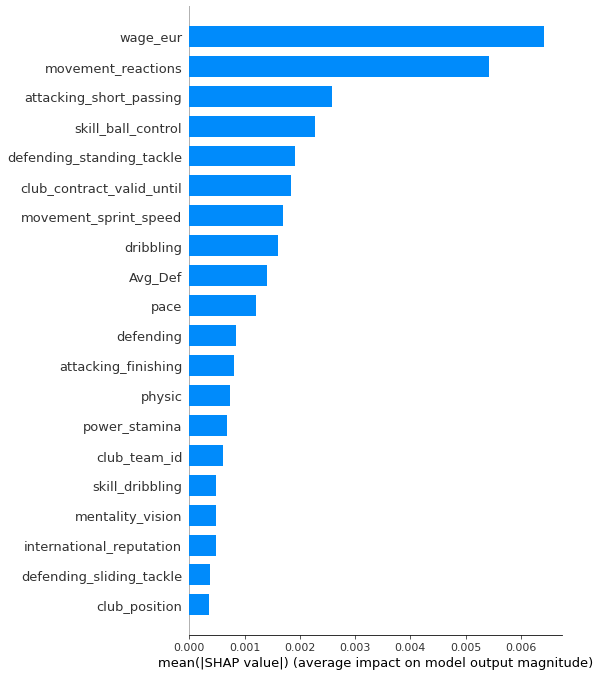

In [47]:
shap.summary_plot(shap_values, x_test, plot_type="bar")

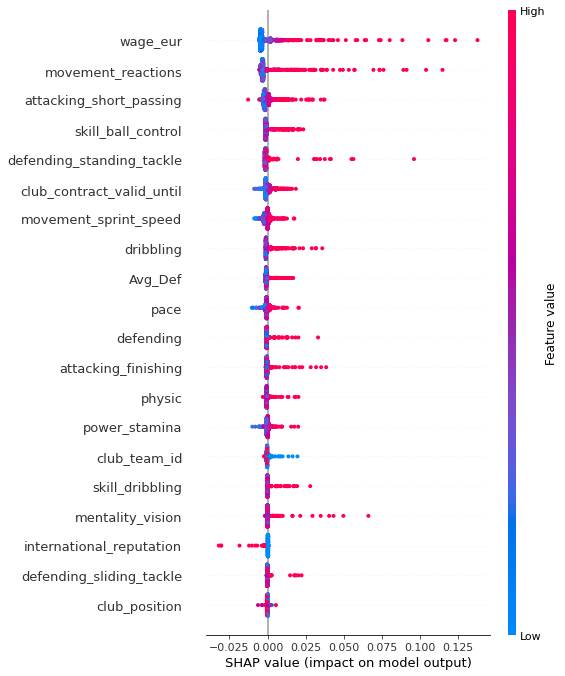

In [48]:
shap.summary_plot(shap_values, x_test)

In [49]:
model.feature_importances_

array([3.80303235e-01, 3.69690119e-04, 6.47155751e-04, 1.16729866e-02,
       3.31306596e-03, 8.42327234e-04, 2.49864248e-02, 7.37015883e-03,
       1.25850963e-03, 3.11044006e-03, 8.18498818e-03, 5.23273457e-04,
       1.96839371e-02, 1.39855776e-03, 1.17112743e-02, 4.34464612e-04,
       2.28106775e-03, 8.05634859e-04, 2.70663919e-02, 7.02058042e-03,
       2.27479997e-02, 0.00000000e+00, 3.54528374e-01, 4.02163808e-04,
       2.69832752e-03, 7.70744297e-04, 7.15905315e-03, 1.55521707e-03,
       3.39852210e-04, 2.45448081e-04, 4.84811626e-04, 1.44741917e-03,
       2.75936480e-02, 2.21823665e-03, 3.01850690e-03, 1.03802304e-03,
       1.43106903e-02, 4.67326413e-03, 8.44138459e-03, 1.38535226e-03,
       6.08786212e-03, 0.00000000e+00, 6.44894137e-04, 2.29568506e-02,
       0.00000000e+00, 2.00420239e-04, 0.00000000e+00, 2.06729196e-03,
       0.00000000e+00, 0.00000000e+00])

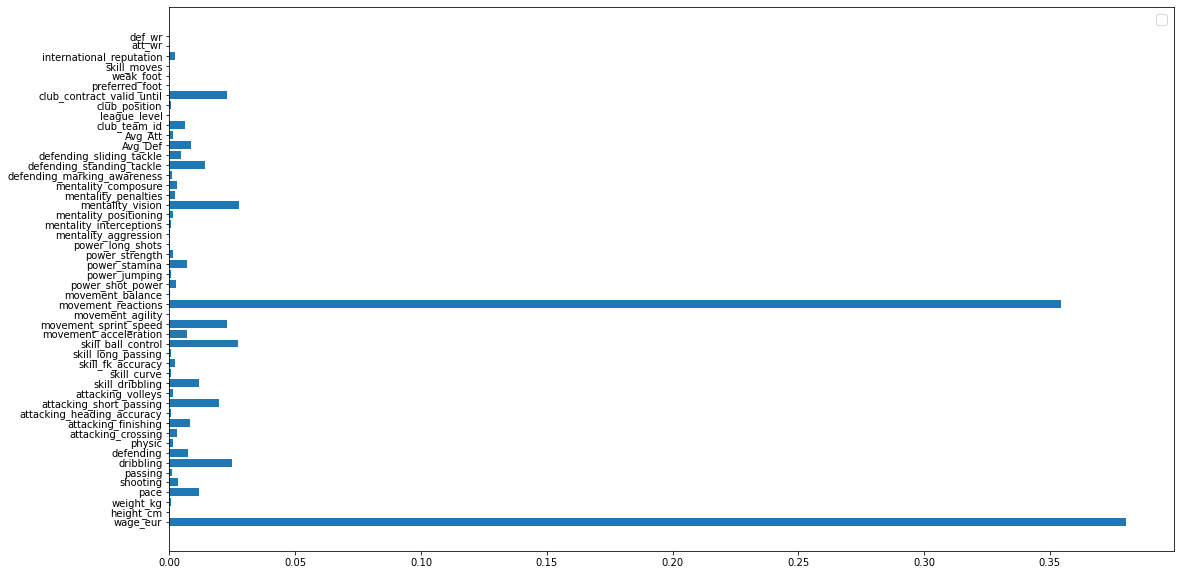

In [50]:
from matplotlib import pyplot as plt
f, ax = plt.subplots(figsize=(18,10))
plt.barh(x_train.columns, model.feature_importances_)
ax.legend(fontsize = 14)

#Run models again w/o wage and movement reactions

In [51]:
x_train = x_train.drop(columns=['movement_reactions', 'wage_eur'])
x_test = x_test.drop(columns=['movement_reactions', 'wage_eur'])
x_test.head(3)

,height_cm,weight_kg,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,...,club_team_id,league_level,club_position,club_contract_valid_until,preferred_foot,weak_foot,skill_moves,international_reputation,att_wr,def_wr
0,0.297872,0.385965,0.637681,0.513158,0.466667,0.500000,0.586667,0.535714,0.594937,0.481928,...,113149.0,1.0,3,2021.0,0,3.0,3.0,1.0,0,2
1,0.404255,0.350877,0.695652,0.644737,0.466667,0.548387,0.080000,0.553571,0.518987,0.674699,...,113302.0,1.0,0,2022.0,1,4.0,3.0,1.0,0,2
2,0.510638,0.403509,0.565217,0.526316,0.466667,0.516129,0.573333,0.517857,0.430380,0.518072,...,110396.0,1.0,2,2023.0,0,3.0,2.0,1.0,2,2


In [52]:
x_train.head(3)

,height_cm,weight_kg,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,...,club_team_id,league_level,club_position,club_contract_valid_until,preferred_foot,weak_foot,skill_moves,international_reputation,att_wr,def_wr
0,0.617021,0.298246,0.652174,0.565789,0.500000,0.548387,0.626667,0.589286,0.443038,0.566265,...,1938.0,2.0,3,2024.0,1,4.0,3.0,1.0,2,2
1,0.510638,0.315789,0.695652,0.381579,0.533333,0.564516,0.773333,0.714286,0.759494,0.361446,...,144.0,2.0,1,2024.0,1,2.0,2.0,1.0,2,2
2,0.638298,0.473684,0.550725,0.671053,0.533333,0.612903,0.733333,0.714286,0.518987,0.674699,...,897.0,1.0,2,2022.0,1,3.0,2.0,1.0,0,2


In [53]:
import numpy as np
import pandas as pd
from math import sqrt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import r2_score
model_eval = []
for model in models:
  model.fit(x_train, y_train)
  predictions = model.predict(x_test)
  type(predictions)
  #FIX CALCS
  # Calculate the absolute errors
  errors = abs(predictions - y_test.values)
  # Calculate model evaluation metrics
  mae = mean_absolute_error(y_test, predictions)
  mse = mean_squared_error(y_test, predictions)
  rmse = sqrt(mse)
  r2 = r2_score(y_test, predictions)
  print(f'MODEL: {model}')
  print('Mean Absolute Error: ', mae, ' degrees.')
  print('Mean Squared Error:', mse, ' degrees')
  print('RMSE:', rmse, ' degrees')
  print('R2:', r2)
  model_eval.append({'Model': model, 'Mean Absolute Error': mae, 'Mean Squared Error': mse, 'RMSE': rmse,'R-squared': r2})

df = pd.DataFrame(model_eval)

MODEL: LinearRegression()
Mean Absolute Error:  0.018616797079406975  degrees.
Mean Squared Error: 0.001101018092929014  degrees
RMSE: 0.03318159268222389  degrees
R2: 0.5732413890852412
MODEL: Ridge(alpha=0.0)
Mean Absolute Error:  0.018617190016217054  degrees.
Mean Squared Error: 0.0011010130849543457  degrees
RMSE: 0.033181517218993255  degrees
R2: 0.573243330194408


With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
Coordinate descent with no regularization may lead to unexpected results and is discouraged.
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.149e+00, tolerance: 2.209e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.


MODEL: Lasso(alpha=0.0)
Mean Absolute Error:  0.018544975931671925  degrees.
Mean Squared Error: 0.0011031424268342712  degrees
RMSE: 0.03321358798495386  degrees
R2: 0.5724179895495307
MODEL: KNeighborsRegressor(n_neighbors=10, weights='distance')
Mean Absolute Error:  0.012460334470809695  degrees.
Mean Squared Error: 0.0010215026550994186  degrees
RMSE: 0.03196095516563012  degrees
R2: 0.604061861530125


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


MODEL: RandomForestRegressor(max_depth=5, n_estimators=550)
Mean Absolute Error:  0.010199988150963712  degrees.
Mean Squared Error: 0.0006658544030220608  degrees
RMSE: 0.025804154762790833  degrees
R2: 0.7419124154906225
MODEL: DecisionTreeRegressor(max_depth=3, max_features='auto',
                      min_weight_fraction_leaf=0.2)
Mean Absolute Error:  0.017692950188398903  degrees.
Mean Squared Error: 0.001955052821502477  degrees
RMSE: 0.04421597925527011  degrees
R2: 0.24221442705831286


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


MODEL: SVR(C=10, gamma=0.001)
Mean Absolute Error:  0.07818127670186384  degrees.
Mean Squared Error: 0.006985280920708379  degrees
RMSE: 0.08357799304068254  degrees
R2: -1.7075202503171494


A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


MODEL: GradientBoostingRegressor(learning_rate=0.02, n_estimators=80, random_state=0)
Mean Absolute Error:  0.011934703837582971  degrees.
Mean Squared Error: 0.0008465609094279667  degrees
RMSE: 0.029095719778482312  degrees
R2: 0.6718699174133311
[12:18:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MODEL: XGBRegressor(learning_rate=0.2, n_estimators=60)
Mean Absolute Error:  0.00765825405014443  degrees.
Mean Squared Error: 0.0004160181184056852  degrees
RMSE: 0.020396522213497213  degrees
R2: 0.8387498666312758


In [54]:
df

,Model,Mean Absolute Error,Mean Squared Error,RMSE,R-squared
0,LinearRegression(),0.018617,0.001101,0.033182,0.573241
1,Ridge(alpha=0.0),0.018617,0.001101,0.033182,0.573243
2,Lasso(alpha=0.0),0.018545,0.001103,0.033214,0.572418
3,"KNeighborsRegressor(n_neighbors=10, weights='d...",0.012460,0.001022,0.031961,0.604062
4,"(DecisionTreeRegressor(max_depth=5, max_featur...",0.010200,0.000666,0.025804,0.741912
5,"DecisionTreeRegressor(max_depth=3, max_feature...",0.017693,0.001955,0.044216,0.242214
6,"SVR(C=10, gamma=0.001)",0.078181,0.006985,0.083578,-1.707520
7,([DecisionTreeRegressor(criterion='friedman_ms...,0.011935,0.000847,0.029096,0.671870
8,"XGBRegressor(learning_rate=0.2, n_estimators=60)",0.007658,0.000416,0.020397,0.838750


In [55]:
#best model
model = XGBRegressor(learning_rate=0.2, n_estimators=60)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
Permutation explainer: 986it [00:48, 15.83it/s]                         


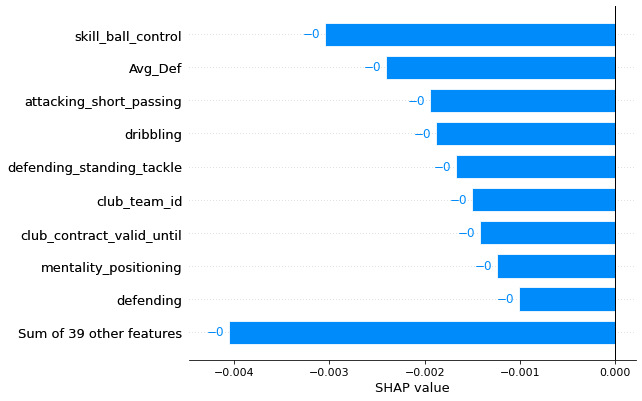

In [56]:
model.fit(x_train, y_train)
explainer = shap.Explainer(model.predict, x_test)
shap_values = explainer(x_test)
shap.plots.bar(shap_values[0])

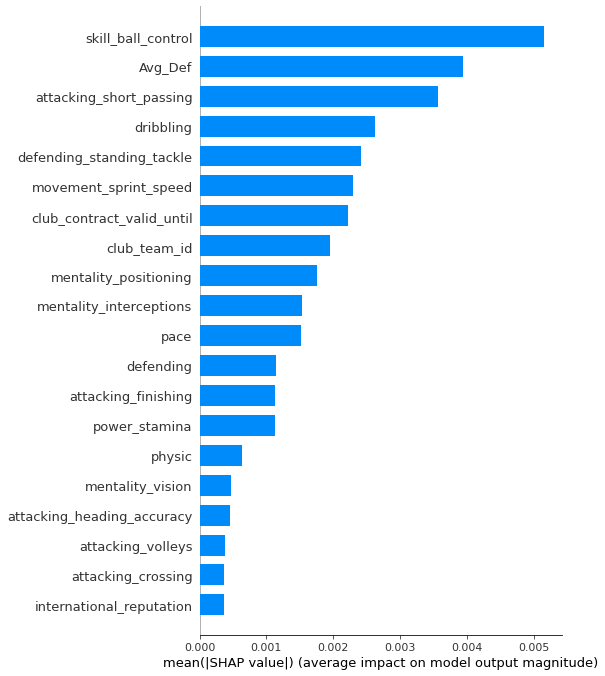

In [57]:
shap.summary_plot(shap_values, x_test, plot_type="bar")

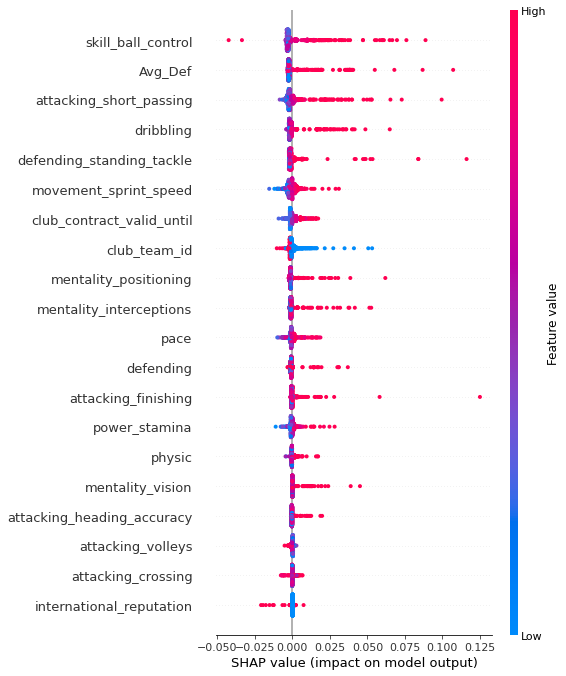

In [58]:
shap.summary_plot(shap_values, x_test)

In [59]:
model.feature_importances_

array([4.87517991e-04, 3.43128620e-03, 3.17220336e-02, 6.47702345e-03,
       1.42609075e-03, 9.77678201e-02, 2.07467872e-02, 3.91127793e-03,
       1.67887591e-03, 2.41305182e-02, 1.23943311e-02, 8.87739685e-02,
       4.21153313e-04, 1.09584537e-02, 2.26913874e-04, 2.06754965e-03,
       1.18819545e-02, 3.25003940e-01, 9.42424615e-03, 1.37162165e-02,
       6.13525108e-04, 4.88787325e-04, 2.30092735e-04, 9.73201295e-04,
       3.04042104e-02, 1.70254395e-04, 1.18904823e-03, 1.03652543e-03,
       2.16471220e-02, 7.28934813e-02, 3.07667670e-03, 1.44962483e-03,
       2.99286604e-03, 9.21657013e-04, 3.76080416e-02, 1.10398193e-02,
       8.16289604e-02, 9.95224530e-03, 3.06544112e-02, 0.00000000e+00,
       0.00000000e+00, 2.13046531e-02, 1.36058223e-04, 7.84702836e-06,
       2.12389396e-04, 2.72054299e-03, 0.00000000e+00, 0.00000000e+00])

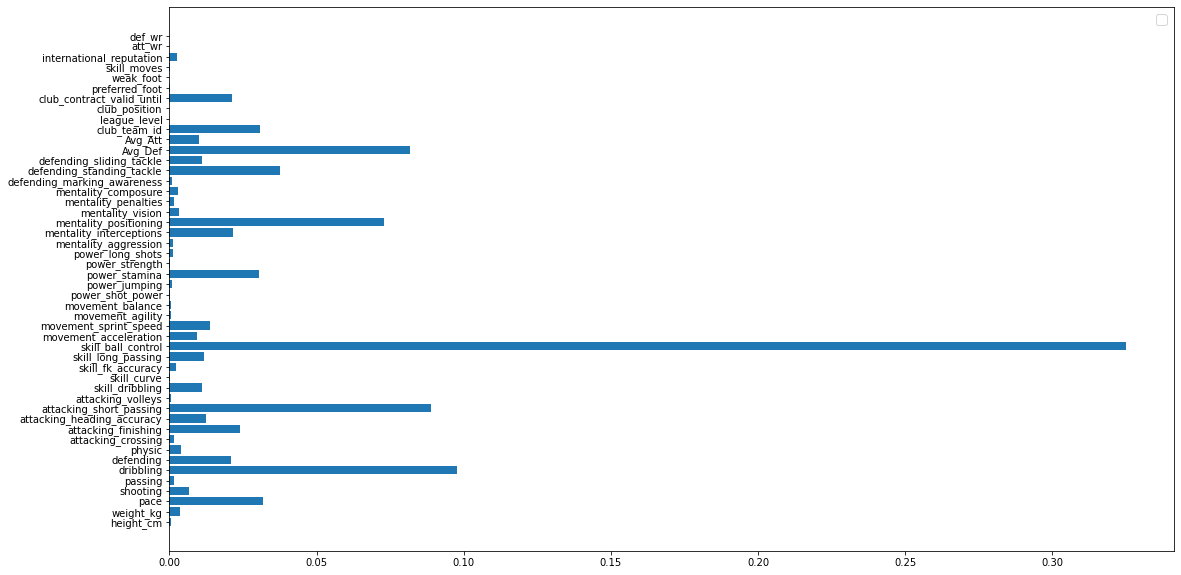

In [60]:
from matplotlib import pyplot as plt
f, ax = plt.subplots(figsize=(18,10))
plt.barh(x_train.columns, model.feature_importances_)
ax.legend(fontsize = 14)